# Imports

In [2]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 62FE-3091

 Directory of C:\Users\JonMc\Documents\Flatiron\MS-movie-studio-project

10/04/2022  04:29 PM    <DIR>          .
09/30/2022  05:22 PM    <DIR>          ..
10/03/2022  12:32 PM             1,953 .gitignore
10/03/2022  12:06 PM    <DIR>          .ipynb_checkpoints
09/30/2022  05:14 PM             5,021 dsc-phase1-project-template.ipynb
10/03/2022  06:43 PM            52,981 holly-notebook.ipynb
10/04/2022  04:29 PM           382,389 Jons notebook.ipynb
09/30/2022  05:22 PM            35,823 LICENSE
10/04/2022  09:04 AM    <DIR>          Notes
09/30/2022  05:14 PM             2,831 TEMPLATE_README.md
10/03/2022  12:06 PM                72 Untitled.ipynb
10/04/2022  04:23 PM    <DIR>          zippedData
               7 File(s)        481,070 bytes
               5 Dir(s)  402,118,168,576 bytes free


# IMDB Database

In [4]:
conn = sqlite3.connect('./zippedData/im.db/im.db')

In [5]:
res = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
for name in res.fetchall():
    print(name[0])

movie_basics
directors
known_for
movie_akas
movie_ratings
persons
principals
writers


In [6]:
pd.read_sql("""
SELECT
    genres
FROM 
    movie_basics
;""", conn).describe()

,genres
count,140736
unique,1085
top,Documentary
freq,32185


In [7]:
pd.read_sql("""
SELECT
    genres
FROM 
    movie_basics
;""", conn).value_counts()

genres                       
Documentary                      32185
Drama                            21486
Comedy                            9177
Horror                            4372
Comedy,Drama                      3519
                                 ...  
Documentary,Horror,Romance           1
Documentary,Horror,Reality-TV        1
Animation,Biography,Fantasy          1
Documentary,Horror,News              1
History,Reality-TV,War               1
Length: 1085, dtype: int64

In [8]:
pd.read_sql("""
SELECT
    averagerating
FROM 
    movie_ratings
;""", conn).describe()

,averagerating
count,73856.000000
mean,6.332729
std,1.474978
min,1.000000
25%,5.500000
50%,6.500000
75%,7.400000
max,10.000000


# Box Office Mojo

Removed nulls for domestic_gross, converted to float
Same for foreign_gross
Created new column ('total_gross') by adding domestic_gross and foreign_gross, concerted to int
Sorted by total_gross
Made plot of top 10 films.  

In [9]:
df_bom = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')
df_bom.index

RangeIndex(start=0, stop=3387, step=1)

In [10]:
df_bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [11]:
df_bom['domestic_gross'].isna().sum()

28

In [12]:
df_bom['domestic_gross'] = df_bom['domestic_gross'].fillna(value='0')

In [13]:
df_bom['domestic_gross'] = df_bom['domestic_gross'].astype(float)
df_bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [14]:
df_bom['domestic_gross'].isna().sum()

0

In [15]:
type(df_bom['domestic_gross'][0])

numpy.float64

In [16]:
df_bom['foreign_gross'].isna().sum()

1350

In [17]:
df_bom['foreign_gross'] = df_bom['foreign_gross'].fillna(value='0')

In [18]:
df_bom.isna().sum()

title             0
studio            5
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [19]:
df_bom['foreign_gross'] = df_bom['foreign_gross'].str.replace(',','')
df_bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [20]:
df_bom['foreign_gross'] = df_bom['foreign_gross'].astype(float)
df_bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [21]:
type(df_bom['foreign_gross'][0])

numpy.float64

In [22]:
df_bom['total_gross'] = df_bom['domestic_gross'] + df_bom['foreign_gross']
df_bom.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [23]:
type(df_bom['total_gross'][0])

numpy.float64

In [24]:
df_bom['total_gross'] = df_bom['total_gross'].astype(int)
df_bom.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1067000000
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1025500000
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,960300000
3,Inception,WB,292600000.0,535700000.0,2010,828300000
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,752600000


In [25]:
df_bom.index

RangeIndex(start=0, stop=3387, step=1)

In [26]:
df_bom.sort_values('total_gross', ascending=False)
df_bom.head(10)

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1067000000
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1025500000
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,960300000
3,Inception,WB,292600000.0,535700000.0,2010,828300000
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,752600000
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,698500000
6,Iron Man 2,Par.,312400000.0,311500000.0,2010,623900000
7,Tangled,BV,200800000.0,391000000.0,2010,591800000
8,Despicable Me,Uni.,251500000.0,291600000.0,2010,543100000
9,How to Train Your Dragon,P/DW,217600000.0,277300000.0,2010,494900000


# Rotten Tomatoes Movie Index

Tried to associate genre and box office, but majority (>1200 out of 1500+) of box office were nulls

In [27]:
df_rt_movie = pd.read_csv('./zippedData/rt.movie_info.tsv.gz', delimiter="\t")
df_rt_movie.index

RangeIndex(start=0, stop=1560, step=1)

In [28]:
df_rt_movie.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [29]:
df_rt_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [30]:
df_rt_movie.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [31]:
df_rt_movie_clean = df_rt_movie.dropna(subset=['box_office'])
df_rt_movie_clean.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures


In [32]:
df_rt_movie_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 1 to 1555
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            340 non-null    int64 
 1   synopsis      340 non-null    object
 2   rating        340 non-null    object
 3   genre         340 non-null    object
 4   director      299 non-null    object
 5   writer        273 non-null    object
 6   theater_date  334 non-null    object
 7   dvd_date      334 non-null    object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       338 non-null    object
 11  studio        305 non-null    object
dtypes: int64(1), object(11)
memory usage: 34.5+ KB


In [33]:
df_rt_movie_clean['total_box_office'] = df_rt_movie_clean['box_office'].str.replace(',','')
df_rt_movie_clean.head()

<ipython-input-33-9d525d92659b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt_movie_clean['total_box_office'] = df_rt_movie_clean['box_office'].str.replace(',','')


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,total_box_office
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,600000
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures,41032915
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics,224114
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN,134904
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures,1039869


In [34]:
df_rt_movie_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 1 to 1555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                340 non-null    int64 
 1   synopsis          340 non-null    object
 2   rating            340 non-null    object
 3   genre             340 non-null    object
 4   director          299 non-null    object
 5   writer            273 non-null    object
 6   theater_date      334 non-null    object
 7   dvd_date          334 non-null    object
 8   currency          340 non-null    object
 9   box_office        340 non-null    object
 10  runtime           338 non-null    object
 11  studio            305 non-null    object
 12  total_box_office  340 non-null    object
dtypes: int64(1), object(12)
memory usage: 37.2+ KB


# Rotten Tomatoes Reviews

Ignored this database so far.

Contains: id, review, rating, fresh, critic, top_critic, publisher, date

In [35]:
df_rt_reviews = pd.read_csv('./zippedData/rt.reviews.tsv.gz', encoding='windows-1252', delimiter="\t")
df_rt_reviews.index

RangeIndex(start=0, stop=54432, step=1)

In [36]:
df_rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


# The Movie Data Base

- Able to sort by highest vote average, with conditional of movies with >10,000 vote counts
- Then connected that to genre_ids category.
- Found short list of what numbers in genre_ids translate too.  Did not investigate API for full list
- Started comparisons using 'popularity' and 'vote_count' at the end

In [37]:
df_tmdb = pd.read_csv('./zippedData/tmdb.movies.csv.gz')
df_tmdb.index

RangeIndex(start=0, stop=26517, step=1)

In [38]:
df_tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [43]:
top_vote_avg = df_tmdb.sort_values('vote_average', ascending=False)
top_vote_avg

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
13258,13258,[99],403294,en,9/11: Simulations,0.600,2014-07-04,9/11: Simulations,10.0,1
7106,7106,[],76495,en,America's Game: 2002 Tampa Bay Buccaneers,0.600,2012-11-26,America's Game: 2002 Tampa Bay Buccaneers,10.0,1
25286,25286,[18],512911,en,Hidden Light,2.330,2018-02-16,Hidden Light,10.0,1
7101,7101,"[99, 80, 18, 28, 36]",117351,en,Top Priority: The Terror Within,0.600,2012-06-15,Top Priority: The Terror Within,10.0,1
7102,7102,[],106978,en,Mayweather vs. Cotto,0.600,2012-05-05,Mayweather vs. Cotto,10.0,1
...,...,...,...,...,...,...,...,...,...,...
26506,26506,[],561861,en,Eden,0.600,2018-11-25,Eden,0.0,1
26507,26507,[99],545555,ar,Dreamaway,0.600,2018-10-14,Dream Away,0.0,2
26508,26508,[16],514492,en,Jaws,0.600,2018-05-29,Jaws,0.0,1
24992,24992,[99],543084,en,The Biggest Little Farm,3.365,2018-09-01,The Biggest Little Farm,0.0,5


In [44]:
type(top_vote_avg['vote_count'][0])

numpy.int64

In [45]:
type(top_vote_avg['vote_average'][0])

numpy.float64

In [46]:
top_votes = top_vote_avg.loc[(top_vote_avg['vote_count'] > 10000) & (top_vote_avg['vote_average'] > 7)]
top_votes = top_votes.sort_values('vote_average', ascending=False)

In [47]:
top_10_votes = top_votes[:10]
top_10_votes

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
2472,2472,"[10751, 16, 18]",8587,en,The Lion King,28.583,1994-06-23,The Lion King,8.2,10160
11032,11032,"[12, 18, 878]",157336,en,Interstellar,28.440,2014-11-05,Interstellar,8.2,18597
11026,11026,"[36, 18, 53, 10752]",205596,en,The Imitation Game,33.078,2014-12-19,The Imitation Game,8.1,10396
2471,2471,"[10751, 14, 12]",12445,en,Harry Potter and the Deathly Hallows: Part 2,29.206,2011-07-15,Harry Potter and the Deathly Hallows: Part 2,8.1,11567
19,19,"[18, 53, 9648]",11324,en,Shutter Island,18.060,2010-02-18,Shutter Island,8.1,12625
14184,14184,"[18, 35, 16, 10751]",150540,en,Inside Out,24.797,2015-06-19,Inside Out,8.0,12691
5189,5189,"[18, 37]",68718,en,Django Unchained,21.260,2012-12-25,Django Unchained,8.0,15725
17443,17443,"[35, 18, 10749]",313369,en,La La Land,16.275,2016-12-09,La La Land,7.9,10028


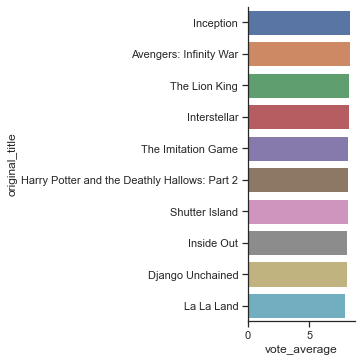

In [48]:
sns.set_theme(style='ticks')
sns.catplot(x='vote_average',y='original_title',kind='bar',data=top_10_votes)
figsize=(15,6)
plt.show();

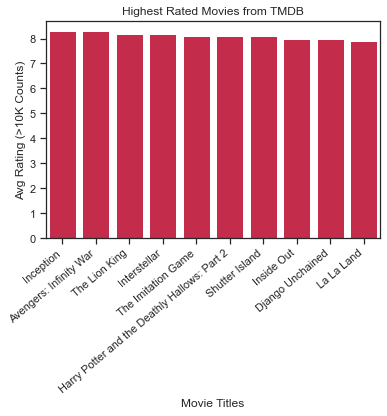

In [75]:


x=top_10_votes['original_title']
y=top_10_votes['vote_average']

ax = sns.barplot(data=top_10_votes, x='original_title', y='vote_average', color='crimson')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel('Movie Titles')
ax.set_ylabel('Avg Rating (>10K Counts)')
ax.set_title('Highest Rated Movies from TMDB')
plt.savefig('./zippedData/highest rated movies from TMDB', bbox_inches='tight', dpi=300);

# TMDB genre codes sampling

MOVIE
- Action          28
- Adventure       12
- Animation       16
- Comedy          35
- Crime           80
- Documentary     99
- Drama           18
- Family          10751
- Fantasy         14
- History         36
- Horror          27
- Music           10402
- Mystery         9648
- Romance         10749
- Science Fiction 878
- TV Movie        10770
- Thriller        53
- War             10752
- Western         37

In [81]:
top_votes_adventure = top_votes['genre_ids'].str.replace('12', 'Adventure')
top_votes_adventure

4                  [28, 878, Adventure]
23811               [Adventure, 28, 14]
2472                    [10751, 16, 18]
11032              [Adventure, 18, 878]
11026               [36, 18, 53, 10752]
2471             [10751, 14, Adventure]
19                       [18, 53, 9648]
14184               [18, 35, 16, 10751]
5189                           [18, 37]
17443                   [35, 18, 10749]
2473                    [16, 35, 10751]
11021              [28, 878, Adventure]
11027                    [9648, 53, 18]
3                       [16, 35, 10751]
20688                   [35, 18, 10749]
7883                       [80, 18, 35]
14170    [Adventure, 10751, 16, 28, 35]
11024    [Adventure, 10751, 16, 28, 35]
20620                     [28, 18, 878]
20622          [28, Adventure, 35, 878]
14188              [18, Adventure, 878]
17397              [18, Adventure, 878]
0                [Adventure, 14, 10751]
5182                   [28, 80, 18, 53]
11063              [28, Adventure, 878]


In [82]:
top_votes['Adventure'] = top_votes_adventure
top_votes.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,Adventure,Adventure & Drama
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,"[28, 878, Adventure]","[28, 878, Adventure]"
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,"[Adventure, 28, 14]","[Adventure, 28, 14]"
2472,2472,"[10751, 16, 18]",8587,en,The Lion King,28.583,1994-06-23,The Lion King,8.2,10160,"[10751, 16, 18]","[10751, 16, Drama]"
11032,11032,"[12, 18, 878]",157336,en,Interstellar,28.440,2014-11-05,Interstellar,8.2,18597,"[Adventure, 18, 878]","[Adventure, Drama, 878]"
11026,11026,"[36, 18, 53, 10752]",205596,en,The Imitation Game,33.078,2014-12-19,The Imitation Game,8.1,10396,"[36, 18, 53, 10752]","[36, Drama, 53, 10752]"


In [53]:
top_votes_adv_drama = top_votes_adventure.str.replace('18', 'Drama')
top_votes_adv_drama

4                  [28, 878, Adventure]
23811               [Adventure, 28, 14]
2472                 [10751, 16, Drama]
11032           [Adventure, Drama, 878]
11026            [36, Drama, 53, 10752]
2471             [10751, 14, Adventure]
19                    [Drama, 53, 9648]
14184            [Drama, 35, 16, 10751]
5189                        [Drama, 37]
17443                [35, Drama, 10749]
2473                    [16, 35, 10751]
11021              [28, 878, Adventure]
11027                 [9648, 53, Drama]
3                       [16, 35, 10751]
20688                [35, Drama, 10749]
7883                    [80, Drama, 35]
14170    [Adventure, 10751, 16, 28, 35]
11024    [Adventure, 10751, 16, 28, 35]
20620                  [28, Drama, 878]
20622          [28, Adventure, 35, 878]
14188           [Drama, Adventure, 878]
17397           [Drama, Adventure, 878]
0                [Adventure, 14, 10751]
5182                [28, 80, Drama, 53]
11063              [28, Adventure, 878]


In [84]:
top_votes['Adventure & Drama'] = top_votes_adv_drama
top_votes.head(10)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,Adventure,Adventure & Drama
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,"[28, 878, Adventure]","[28, 878, Adventure]"
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,"[Adventure, 28, 14]","[Adventure, 28, 14]"
2472,2472,"[10751, 16, 18]",8587,en,The Lion King,28.583,1994-06-23,The Lion King,8.2,10160,"[10751, 16, 18]","[10751, 16, Drama]"
11032,11032,"[12, 18, 878]",157336,en,Interstellar,28.440,2014-11-05,Interstellar,8.2,18597,"[Adventure, 18, 878]","[Adventure, Drama, 878]"
11026,11026,"[36, 18, 53, 10752]",205596,en,The Imitation Game,33.078,2014-12-19,The Imitation Game,8.1,10396,"[36, 18, 53, 10752]","[36, Drama, 53, 10752]"
2471,2471,"[10751, 14, 12]",12445,en,Harry Potter and the Deathly Hallows: Part 2,29.206,2011-07-15,Harry Potter and the Deathly Hallows: Part 2,8.1,11567,"[10751, 14, Adventure]","[10751, 14, Adventure]"
19,19,"[18, 53, 9648]",11324,en,Shutter Island,18.060,2010-02-18,Shutter Island,8.1,12625,"[18, 53, 9648]","[Drama, 53, 9648]"
14184,14184,"[18, 35, 16, 10751]",150540,en,Inside Out,24.797,2015-06-19,Inside Out,8.0,12691,"[18, 35, 16, 10751]","[Drama, 35, 16, 10751]"
5189,5189,"[18, 37]",68718,en,Django Unchained,21.260,2012-12-25,Django Unchained,8.0,15725,"[18, 37]","[Drama, 37]"
17443,17443,"[35, 18, 10749]",313369,en,La La Land,16.275,2016-12-09,La La Land,7.9,10028,"[35, 18, 10749]","[35, Drama, 10749]"


In [54]:
most_popular = top_vote_avg.loc[(top_vote_avg['popularity'] > 40) & (top_vote_avg['vote_count'] > 1000)]
most_popular = most_popular.sort_values('popularity', ascending=False)

In [86]:
most_popular_ten = most_popular[:10]
most_popular_ten

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
23812,23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
11021,11021,"[28, 878, 12]",118340,en,Guardians of the Galaxy,49.606,2014-08-01,Guardians of the Galaxy,7.9,17958
20617,20617,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679
23813,23813,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679
23814,23814,[12],338952,en,Fantastic Beasts: The Crimes of Grindelwald,48.508,2018-11-16,Fantastic Beasts: The Crimes of Grindelwald,6.9,4870
23815,23815,"[10751, 16, 35, 14, 12]",404368,en,Ralph Breaks the Internet,48.057,2018-11-21,Ralph Breaks the Internet,7.2,2626


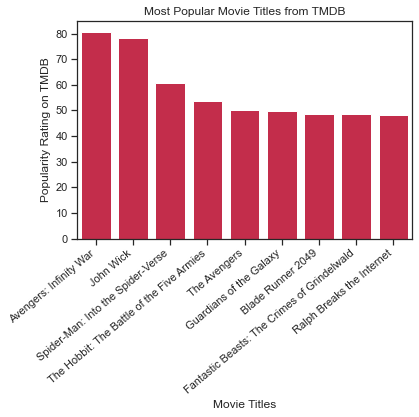

In [74]:
ax = sns.barplot(data=most_popular_ten, x='original_title', y='popularity', color='crimson')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel('Movie Titles')
ax.set_ylabel('Popularity Rating on TMDB')
ax.set_title('Most Popular Movie Titles from TMDB')
plt.savefig('./zippedData/most popular movie titles from TMDB', bbox_inches='tight', dpi=300);

# The Numbers database (more budget info)

Juan cleaned worldwide_gross column and sorted it

In [57]:
df_tn_budg = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')
df_tn_budg.index

RangeIndex(start=0, stop=5782, step=1)

In [58]:
df_tn_budg.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [59]:
df_tn_budg['domestic_gross'] = df_tn_budg['domestic_gross'].str.replace(',','')
df_tn_budg['domestic_gross'] = df_tn_budg['domestic_gross'].str.replace('$','')
df_tn_budg['domestic_gross']

0       760507625
1       241063875
2        42762350
3       459005868
4       620181382
          ...    
5777            0
5778        48482
5779         1338
5780            0
5781       181041
Name: domestic_gross, Length: 5782, dtype: object

# Video Game Movies

sorted by worldwide box office

In [60]:
df_vid_game = pd.read_csv('./zippedData/video_game_films.csv')
df_vid_game.index

RangeIndex(start=0, stop=42, step=1)

In [61]:
df_vid_game.head()

,Title,Release date,Worldwide box office,Rotten Tomatoes,Metacritic,Distributor,Original game publisher
0,Super Mario Bros.,1993-05-28,38912465.0,24.0,35.0,Buena Vista Pictures Distribution,Nintendo
1,Double Dragon,1994-11-04,4152699.0,13.0,NaN,Gramercy Pictures,Technōs Japan
2,Street Fighter,1994-12-23,99423521.0,13.0,34.0,Universal Pictures,Capcom
3,Mortal Kombat,1995-08-18,124741822.0,44.0,60.0,New Line Cinema,Midway
4,Mortal Kombat: Annihilation,1997-11-21,51376861.0,2.0,11.0,New Line Cinema,Midway


In [62]:
vid_games_box_off = df_vid_game.sort_values('Worldwide box office', ascending=False)
vid_games_box_off[:25]

,Title,Release date,Worldwide box office,Rotten Tomatoes,Metacritic,Distributor,Original game publisher
30,Warcraft,2016-06-10,439048914.0,28.0,32.0,Universal Pictures,Blizzard Entertainment
36,Detective Pikachu,2019-05-10,433005346.0,68.0,53.0,Warner Bros. Pictures,NintendoThe Pokémon Company
34,Rampage,2018-04-13,428028233.0,51.0,45.0,Warner Bros. Pictures,WB Games
24,Prince of Persia: The Sands of Time,2010-05-28,336365676.0,37.0,50.0,Walt Disney Studios Motion Pictures,Ubisoft
37,Sonic the Hedgehog,2020-02-14,320954026.0,63.0,47.0,Paramount Pictures,Sega Sammy
32,Resident Evil: The Final Chapter,2017-01-27,312257250.0,37.0,49.0,Sony Pictures Releasing,Capcom
25,Resident Evil: Afterlife,2010-09-10,300228084.0,22.0,37.0,Sony Pictures Releasing,Capcom
6,Lara Croft: Tomb Raider,2001-06-15,274703340.0,20.0,33.0,Paramount Pictures,Eidos
33,Tomb Raider,2018-03-16,274650803.0,52.0,48.0,Warner Bros. Pictures,Square Enix
31,Assassin's Creed,2016-12-21,240558621.0,18.0,36.0,20th Century Fox,Ubisoft


In [63]:
vid_games_plt_data = vid_games_box_off[:10]
vid_games_plt_data

,Title,Release date,Worldwide box office,Rotten Tomatoes,Metacritic,Distributor,Original game publisher
30,Warcraft,2016-06-10,439048914.0,28.0,32.0,Universal Pictures,Blizzard Entertainment
36,Detective Pikachu,2019-05-10,433005346.0,68.0,53.0,Warner Bros. Pictures,NintendoThe Pokémon Company
34,Rampage,2018-04-13,428028233.0,51.0,45.0,Warner Bros. Pictures,WB Games
24,Prince of Persia: The Sands of Time,2010-05-28,336365676.0,37.0,50.0,Walt Disney Studios Motion Pictures,Ubisoft
37,Sonic the Hedgehog,2020-02-14,320954026.0,63.0,47.0,Paramount Pictures,Sega Sammy
32,Resident Evil: The Final Chapter,2017-01-27,312257250.0,37.0,49.0,Sony Pictures Releasing,Capcom
25,Resident Evil: Afterlife,2010-09-10,300228084.0,22.0,37.0,Sony Pictures Releasing,Capcom
6,Lara Croft: Tomb Raider,2001-06-15,274703340.0,20.0,33.0,Paramount Pictures,Eidos
33,Tomb Raider,2018-03-16,274650803.0,52.0,48.0,Warner Bros. Pictures,Square Enix
31,Assassin's Creed,2016-12-21,240558621.0,18.0,36.0,20th Century Fox,Ubisoft


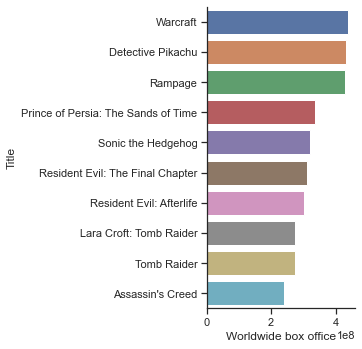

In [64]:
sns.set_theme(style='ticks')
sns.catplot(x='Worldwide box office',y='Title',kind='bar',data=vid_games_plt_data)
figsize=(15,6)
plt.show();

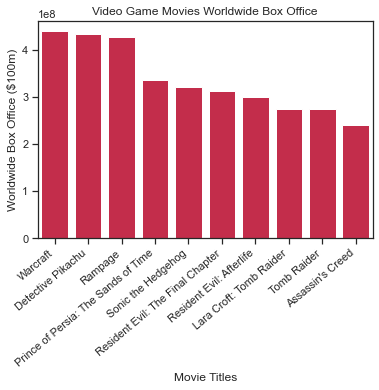

In [73]:
ax = sns.barplot(data=vid_games_plt_data, x='Title', y='Worldwide box office', color='crimson')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel('Movie Titles')
ax.set_ylabel('Worldwide Box Office ($100m)')
ax.set_title('Video Game Movies Worldwide Box Office')
plt.savefig('./zippedData/video game movies worldwide box office', bbox_inches='tight', dpi=300);

In [66]:
pwd

'C:\\Users\\JonMc\\Documents\\Flatiron\\MS-movie-studio-project'

In [67]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 62FE-3091

 Directory of C:\Users\JonMc\Documents\Flatiron\MS-movie-studio-project

10/04/2022  05:01 PM    <DIR>          .
09/30/2022  05:22 PM    <DIR>          ..
10/03/2022  12:32 PM             1,953 .gitignore
10/03/2022  12:06 PM    <DIR>          .ipynb_checkpoints
09/30/2022  05:14 PM             5,021 dsc-phase1-project-template.ipynb
10/03/2022  06:43 PM            52,981 holly-notebook.ipynb
10/04/2022  05:01 PM           125,978 Jons notebook.ipynb
09/30/2022  05:22 PM            35,823 LICENSE
10/04/2022  09:04 AM    <DIR>          Notes
09/30/2022  05:14 PM             2,831 TEMPLATE_README.md
10/03/2022  12:06 PM                72 Untitled.ipynb
10/04/2022  04:23 PM    <DIR>          zippedData
               7 File(s)        224,659 bytes
               5 Dir(s)  402,117,705,728 bytes free


In [68]:
cd zippedData/

C:\Users\JonMc\Documents\Flatiron\MS-movie-studio-project\zippedData


In [69]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 62FE-3091

 Directory of C:\Users\JonMc\Documents\Flatiron\MS-movie-studio-project\zippedData

10/04/2022  04:23 PM    <DIR>          .
10/04/2022  05:01 PM    <DIR>          ..
10/03/2022  06:43 PM           188,185 all-weeks-global.tsv
09/30/2022  05:14 PM            53,544 bom.movie_gross.csv.gz
10/04/2022  05:01 PM            34,445 highest rated movies from TMDB.png
10/03/2022  12:25 PM    <DIR>          im.db
09/30/2022  05:14 PM        67,149,708 im.db.zip
10/04/2022  05:01 PM           135,484 most popular movie titles from TMDB.png
10/03/2022  12:41 PM         1,220,764 Netflix_movies_and_tv_shows_clustering.csv.zip
09/30/2022  05:14 PM           498,202 rt.movie_info.tsv.gz
09/30/2022  05:14 PM         3,402,194 rt.reviews.tsv.gz
09/30/2022  05:14 PM           827,840 tmdb.movies.csv.gz
09/30/2022  05:14 PM           153,218 tn.movie_budgets.csv.gz
10/03/2022  06:43 PM             5,528 top-netflix-scraper.ipynb
10/04/202

In [70]:
cd ..

C:\Users\JonMc\Documents\Flatiron\MS-movie-studio-project
